# Logo with black background  - Cut and paste

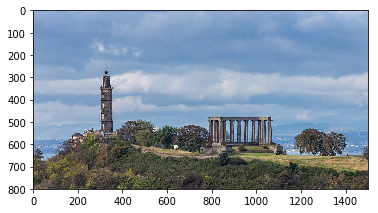

In [14]:
import numpy as np
from PIL import Image as image
import matplotlib.pyplot as plt
from IPython.display import Image, display
from io import BytesIO
%matplotlib inline

img = np.array(image.open('monument.jpg'))
plt.imshow(img, interpolation='nearest')

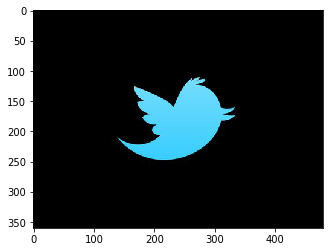

In [3]:
## Image to be pasted ###

logo = np.array(Image.open('twitter.jpg'))
plt.imshow(logo, interpolation='nearest')

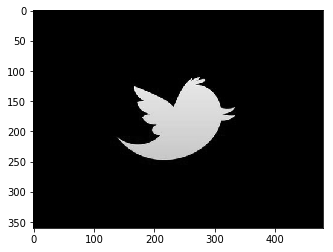

In [4]:
gray = np.zeros((logo.shape[0], logo.shape[1]))

for i in range(len(logo)):
    for j in range(len(logo[i])):
        gray[i][j] = 0.299*logo[i][j][0] + 0.587*logo[i][j][1] + 0.114*logo[i][j][2]

plt.imshow(gray, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

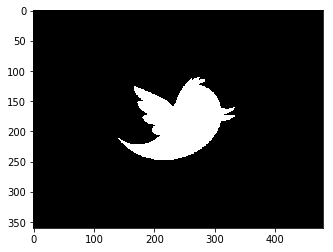

In [5]:
## Apply threshold ##

mask = np.zeros((logo.shape[0], logo.shape[1]))
for i in range(logo.shape[0]):
    for j in range(logo.shape[1]):
        mask[i][j] = 255 if gray[i][j]>50 else 0

plt.imshow(mask, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

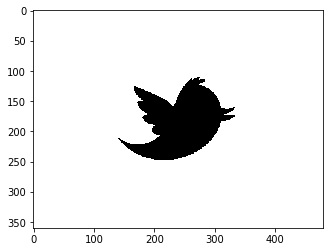

In [6]:
notImage = np.zeros((gray.shape[0], gray.shape[1]), dtype=np.int32)

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        notImage[i][j] = ~int(mask[i][j])

plt.imshow(notImage, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

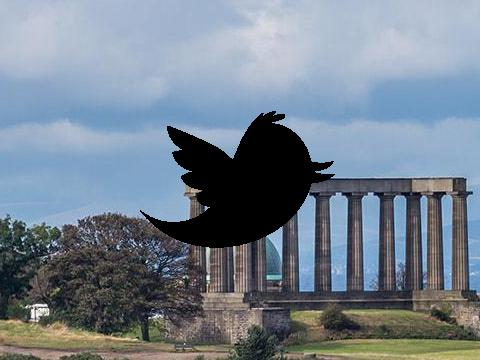

In [21]:
roi = img[300:300+logo.shape[0], 600:600+logo.shape[1]]
f = BytesIO()
andImage = np.zeros((roi.shape[0], roi.shape[1], roi.shape[2]))

for i in range(roi.shape[0]):
    for j in range(roi.shape[1]):
        for k in range(roi.shape[2]):
            andImage[i][j][k] = int(roi[i][j][k]) & int(notImage[i][j])
image.fromarray(andImage.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

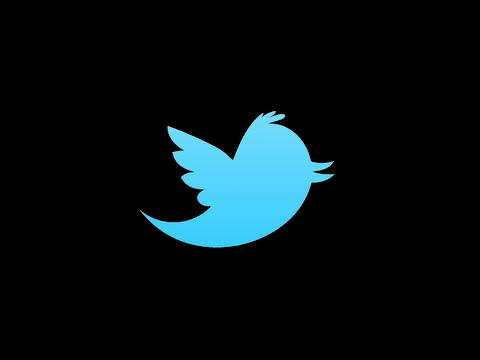

In [23]:
andLogo = np.zeros((roi.shape[0], roi.shape[1], roi.shape[2]))

for i in range(roi.shape[0]):
    for j in range(roi.shape[1]):
        for k in range(roi.shape[2]):
            andLogo[i][j][k] = int(logo[i][j][k]) & int(mask[i][j])
f = BytesIO()
image.fromarray(andLogo.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

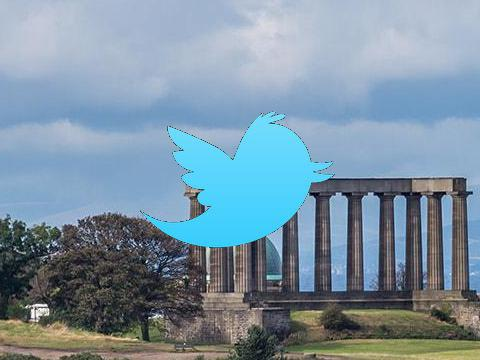

In [25]:
final = np.zeros((logo.shape[0], logo.shape[1], logo.shape[2]))
for i in range(logo.shape[0]):
    for j in range(logo.shape[1]):
        for k in range(logo.shape[2]):
            final[i][j][k] = int(andImage[i][j][k]) | int(andLogo[i][j][k])

f = BytesIO()
image.fromarray(final.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))

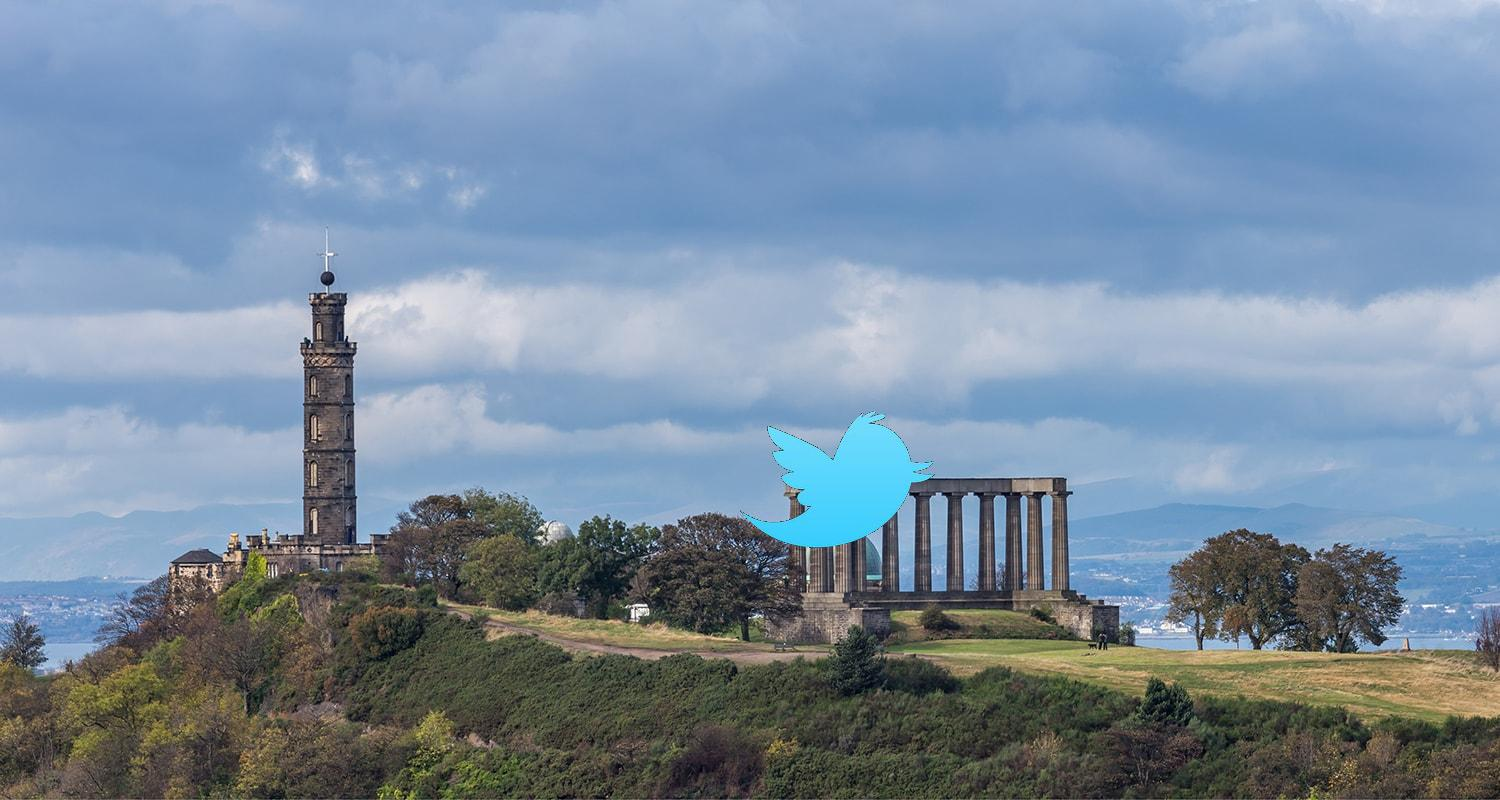

In [26]:
img[300:300+logo.shape[0], 600:600+logo.shape[1]] = final
f = BytesIO()
image.fromarray(img.astype('uint8')).save(f, 'jpeg')
display(Image(f.getvalue()))